# Building functional API NN models using tf.keras and training it on the california housing dataset.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

## Loading the data

In [2]:
housing = fetch_california_housing()

In [3]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df['target'] = pd.Series(housing.target)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
x = np.array(df.drop(columns = 'target', axis = 1))
y = np.array(df.target)

- We will be splitting the data int train, vlid and test sets.
- Then we will scale the sets using Standard Scaler

In [8]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42) 

In [9]:
x_train.shape

(11610, 8)

In [10]:
x_valid.shape

(3870, 8)

In [11]:
x_test.shape

(5160, 8)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [13]:
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

## Building the model

In [14]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

- We are building a wide and deep model. This model include both the simplicity and complexiveness of the data while training.

In [15]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

## Compiling the model

In [16]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 1e-3))

- We used the mean squared error loss function and the SGD optimizer with a learning rate of 10^-3.

## Training the model

In [17]:
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.7408 - val_loss: 0.9243
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6061 - val_loss: 0.5839
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5478 - val_loss: 0.5183
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5209 - val_loss: 0.5107
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5005 - val_loss: 0.4789
Epoch 6/20
363/363 [==============================] - 0s 931us/step - loss: 0.4855 - val_loss: 0.4872
Epoch 7/20
363/363 [==============================] - 0s 929us/step - loss: 0.4734 - val_loss: 0.4541
Epoch 8/20
363/363 [==============================] - 0s 926us/step - loss: 0.4635 - val_loss: 0.4551
Epoch 9/20
363/363 [==============================] - 0s 913us/step - loss: 0.4556 - val_loss: 0.4431
Epoch 10/20
363/363 [==============================] - 0s 949us/step - loss: 0.4486 - val_lo

- The training mse at the end of 20 epochs is 0.406 and the validation mse is 0.382.

In [18]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 589us/step - loss: 0.4011


- The mse on test set is found to be 0.393.

In [19]:
x_new = x_test[:3]

In [20]:
y_pred = model.predict(x_new)

In [21]:
y_pred

array([[0.58263123],
       [1.8843911 ],
       [3.4051507 ]], dtype=float32)

In [22]:
df_metrics = pd.DataFrame(history.history)

In [23]:
df_metrics.sample(10)

,loss,val_loss
13,0.428669,0.441631
11,0.436988,0.472356
6,0.473445,0.454056
9,0.448552,0.445058
15,0.421283,0.431067
0,1.740783,0.924283
10,0.442632,0.442054
1,0.606123,0.583860
19,0.409751,0.407361
8,0.455625,0.443102


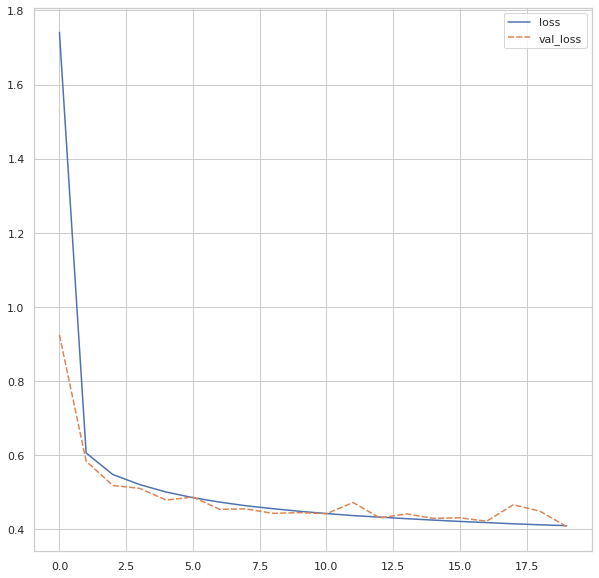

In [24]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,10))
ax = sns.lineplot(data = df_metrics)

# Multiple inputs 

- We will be sending a sub-set of features through the wide path and a differetn subset through the deep path.
- We will be sending the first 5 features through the wide path(0-4) and 6 features through the deep path(2-7).

In [25]:
x_train_a, x_train_b = x_train[:, :5], x_train[:, 2:]
x_valid_a, x_valid_b = x_valid[:, :5], x_valid[:, 2:]
x_test_a, x_test_b = x_test[:, :5], x_test[:, 2:]
x_new_a, x_new_b = x_test_a[:3], x_test_b[:3]

## Building the model

In [26]:
input_a = keras.layers.Input(shape = [5], name = 'wide_input')
input_b = keras.layers.Input(shape = [6], name = 'deep_input')
hidden_1 = keras.layers.Dense(30, activation = 'relu')(input_b)
hidden_2 = keras.layers.Dense(30, activation = 'relu')(hidden_1)
concat = keras.layers.Concatenate()([input_a, hidden_2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_a, input_b], outputs = [output])

- We have to input a & b. a is fed directly to the concatenate layer and b is fed to the hiden layers.

## Compiling the model

In [27]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.SGD(lr = 1e-3))

## Training the model

In [28]:
history = model.fit((x_train_a, x_train_b), y_train, epochs = 20, validation_data = ((x_valid_a, x_valid_b), y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.7077 - val_loss: 1.1309
Epoch 2/20
363/363 [==============================] - 0s 960us/step - loss: 0.8984 - val_loss: 0.7325
Epoch 3/20
363/363 [==============================] - 0s 951us/step - loss: 0.6876 - val_loss: 0.6254
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6070 - val_loss: 0.5693
Epoch 5/20
363/363 [==============================] - 0s 988us/step - loss: 0.5583 - val_loss: 0.6088
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5271 - val_loss: 0.5641
Epoch 7/20
363/363 [==============================] - 0s 934us/step - loss: 0.5003 - val_loss: 0.5152
Epoch 8/20
363/363 [==============================] - 0s 957us/step - loss: 0.4824 - val_loss: 0.4999
Epoch 9/20
363/363 [==============================] - 0s 929us/step - loss: 0.4678 - val_loss: 0.4805
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4581 - val_

In [29]:
mse_test = model.evaluate((x_test_a, x_test_b), y_test)

162/162 [==============================] - 0s 618us/step - loss: 0.4198


In [30]:
y_pred = model.predict((x_new_a, x_new_b))

In [31]:
y_pred

array([[0.49986523],
       [1.9821103 ],
       [3.2879186 ]], dtype=float32)

In [32]:
df_metrics = pd.DataFrame(history.history)

In [33]:
df_metrics

,loss,val_loss
0,2.707705,1.130920
1,0.898410,0.732476
2,0.687636,0.625411
3,0.606996,0.569261
4,0.558254,0.608837
5,0.527102,0.564131
6,0.500325,0.515169
7,0.482419,0.499924
8,0.467836,0.480453
9,0.458111,0.423285


(0.0, 20.0, 0.0, 1.0)

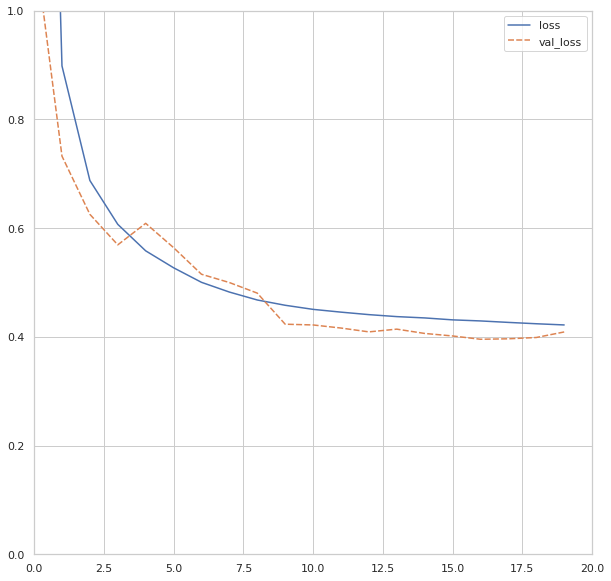

In [34]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df_metrics)
plt.axis([0, 20, 0, 1])

# Multiple outputs

- We will be adding an auxillary output to the previous model to ensure that the underlying part of the neural network learns something on its own, without relying on the rest of the network.

## Building the model

In [38]:
x_train_b.shape[1:]

(6,)

In [41]:
input_a = keras.layers.Input(shape = x_train_a.shape[1:], name = 'wide_input')
input_b = keras.layers.Input(shape = x_train_b.shape[1:], name = 'deep_input')
hidden_1 = keras.layers.Dense(30, activation = 'relu')(input_b)
hidden_2 = keras.layers.Dense(30, activation = 'relu')(hidden_1)
concat = keras.layers.Concatenate()([input_a, hidden_2])
output = keras.layers.Dense(1, name = 'main_output')(concat)
aux_output = keras.layers.Dense(1, name = 'aux_output')(hidden_2)
model = keras.models.Model(inputs = [input_a, input_b], outputs = [output, aux_output])

In [42]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
_______________________________________________________________________________________

## Compiling the model

In [43]:
model.compile(loss = ['mse', 'mse'], loss_weights = [0.9, 0.1], optimizer = keras.optimizers.SGD(lr = 1e-3))

- We have passed a list of loss functions for each of the outputs. 
- Since we care more about the main output, we have set the weights accordingly, giving 0.9 to the main output and 0.1 to the auxiliary output.

## Training the model

In [44]:
history = model.fit([x_train_a, x_train_b], [y_train, y_train], epochs = 20, validation_data = ([x_valid_a, x_valid_b], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.6819 - main_output_loss: 2.5189 - aux_output_loss: 4.1492 - val_loss: 3.2362 - val_main_output_loss: 3.2157 - val_aux_output_loss: 3.4205
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0574 - main_output_loss: 0.9012 - aux_output_loss: 2.4631 - val_loss: 1.0266 - val_main_output_loss: 0.7855 - val_aux_output_loss: 3.1965
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8458 - main_output_loss: 0.7331 - aux_output_loss: 1.8601 - val_loss: 0.8540 - val_main_output_loss: 0.6870 - val_aux_output_loss: 2.3568
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7636 - main_output_loss: 0.6771 - aux_output_loss: 1.5426 - val_loss: 0.7974 - val_main_output_loss: 0.6779 - val_aux_output_loss: 1.8733
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7115 - main_output_loss: 0.6381 - aux_output_loss: 1.3720 - val_loss

In [45]:
df = pd.DataFrame(history.history)

<AxesSubplot:>

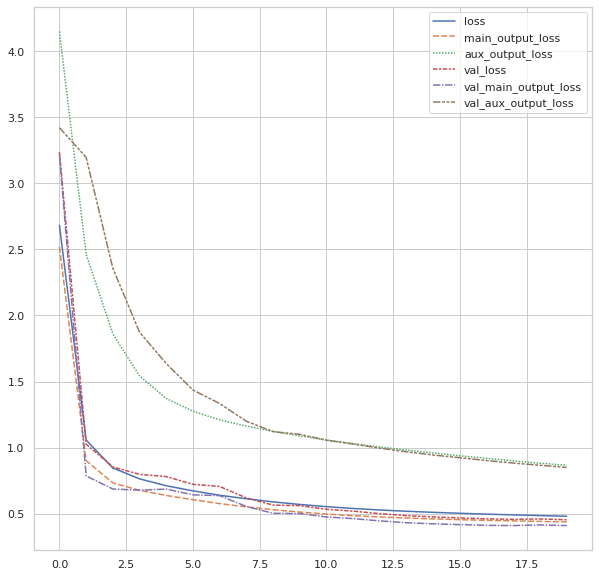

In [47]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df)

- We can see that the training and validation loss of auxiliary output is much higher than that of the main output.
- From this we can say that the addition of simple features form the wide input to the NN increases the accuracy.

## Evaluating the model

In [48]:
model.evaluate([x_test_a, x_test_b], [y_test, y_test])

162/162 [==============================] - 0s 875us/step - loss: 0.4680 - main_output_loss: 0.4271 - aux_output_loss: 0.8362


[0.46800485253334045, 0.4270954132080078, 0.8361920714378357]

- The overall loss is found to be 0.468, the main output loss 0.4271, and the auxiliary loss 0.8362.